


## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## The Data

Reading in the titanic_train.csv file into a pandas dataframe.

In [31]:
train = pd.read_csv('data/titanic_train.csv')

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

checking out missing data

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

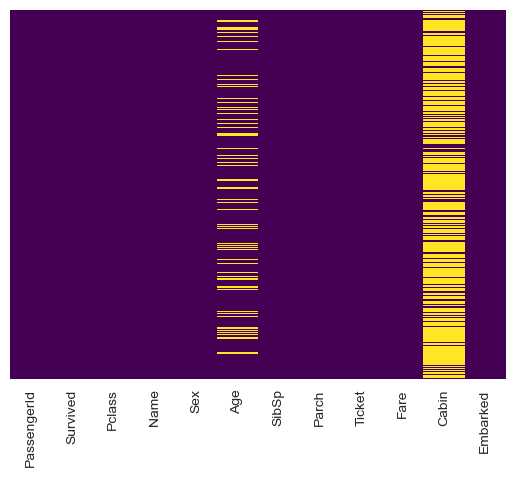

In [36]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Roughly 20 percent of the Age data is missing. 

The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level.

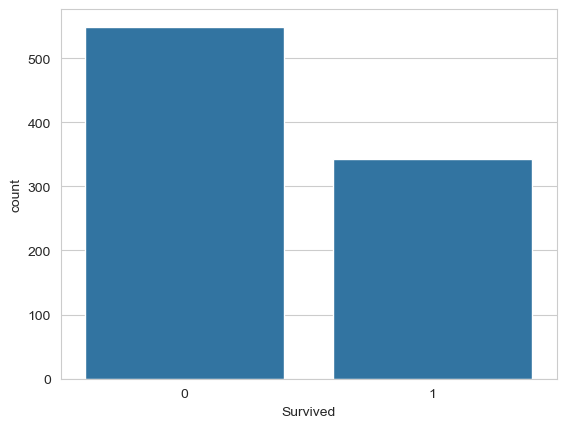

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='Age', ylabel='count'>

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='Age', ylabel='count'>

In [12]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Age', ylabel='count'>

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Age', ylabel='count'>

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


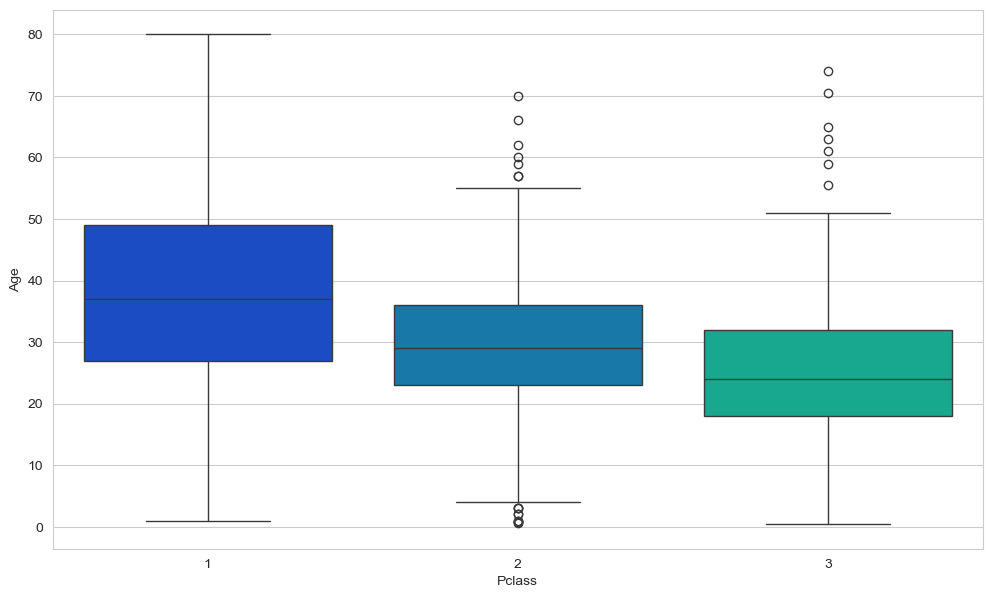

In [40]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 

We'll use these average age values to impute based on Pclass for Age.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

check that heat map again!

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

drop the Cabin column and the row in Embarked that is NaN.

In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
sex = pd.get_dummies(train['Sex'])
embark = pd.get_dummies(train['Embarked'])

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
train = pd.concat([train,sex,embark],axis=1)

In [26]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,889,0,3,24.0,1,2,23.4500,True,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [27]:
x= train.drop('Survived',axis=1)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,False,True,False,False,True
887,888,1,19.0,0,0,30.0000,True,False,False,False,True
888,889,3,24.0,1,2,23.4500,True,False,False,False,True
889,890,1,26.0,0,0,30.0000,False,True,True,False,False


In [28]:
y=train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [29]:
# Standardization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x

array([[0.        , 1.        , 0.27117366, ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 0.        , 0.4722292 , ..., 1.        , 0.        ,
        0.        ],
       [0.00224719, 1.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 1.        , 0.2963056 , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 0.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 1.        ,
        0.        ]])